### Support Linetype in `geom_tile()`

In [1]:
import numpy as np
import geopandas as gpd
import random
from lets_plot import *
from lets_plot.geo_data import *

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



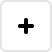
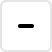
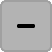
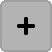
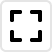
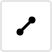
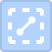
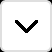
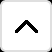
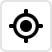
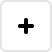
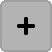
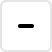
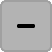
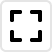
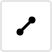
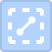
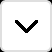
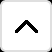
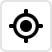

In [2]:
LetsPlot.setup_html()

In [3]:
data = {
    'x': [1, 2],
    'y': [1, 1]
}

In [4]:
ggplot(data) + geom_tile(aes(x='x', y='y'), color='rgba(0,0,0,0.2)', size=2, alpha = 0.3, linetype=4)

In [5]:
nlon, nlat = 30, 20
geometry = geocode_countries("Kazakhstan").get_boundaries().iloc[0].geometry
bbox = geometry.bounds
lonspace = np.linspace(bbox[0], bbox[2], nlon)
latspace = np.linspace(bbox[1], bbox[3], nlat)
longrid, latgrid = np.meshgrid(lonspace, latspace)
lon, lat = longrid.flatten(), latgrid.flatten()
within = gpd.points_from_xy(lon, lat).within(geometry)

In [6]:
ggplot() + geom_livemap() + \
    geom_tile(aes(x=lon, y=lat, fill=within), color='black', size=0.1, alpha=.5, show_legend=False, linetype=3)